In [2]:
# The term you are looking for to find the best choice of parameters when you have data values:
# supervised dimensionality reduction

%pylab inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [4]:
sys.path.insert(0, '../../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)

import constants
imp.reload(constants)
from constants import *

# Get saved training-set waveforms

In [5]:
# trainset = ws.HDF5WaveformSet('../../data/teobtest40hz/dh_train_corners_lhd.hdf5')
# Bamp_filename = '../../data/teobtest40hz/B_amp_corners_lhd.hdf5'
# Bphase_filename = '../../data/teobtest40hz/B_phase_corners_lhd.hdf5'
# amp_gp_filename = '../../data/teobtest40hz/gp_amp_corners_lhd.hdf5'
# phase_gp_filename = '../../data/teobtest40hz/gp_phase_corners_lhd.hdf5'


# trainset = ws.HDF5WaveformSet('../../data/teobtest40hz/dh_train_lhd_uncsamp.hdf5')
# Bamp_filename = '../../data/teobtest40hz/B_amp_lhd_uncsamp.hdf5'
# Bphase_filename = '../../data/teobtest40hz/B_phase_lhd_uncsamp.hdf5'
# amp_gp_filename = '../../data/teobtest40hz/gp_amp_lhd_uncsamp.hdf5'
# phase_gp_filename = '../../data/teobtest40hz/gp_phase_lhd_uncsamp.hdf5'


trainset = ws.HDF5WaveformSet('../../data/teobtest40hz/dh_train_lhd_uncsamp_rand.hdf5')
Bamp_filename = '../../data/teobtest40hz/B_amp_lhd_uncsamp_rand.hdf5'
Bphase_filename = '../../data/teobtest40hz/B_phase_lhd_uncsamp_rand.hdf5'
amp_gp_filename = '../../data/teobtest40hz/gp_amp_lhd_uncsamp_rand.hdf5'
phase_gp_filename = '../../data/teobtest40hz/gp_phase_lhd_uncsamp_rand.hdf5'

In [6]:
trainset.parameters().shape

(1010, 5)

1010


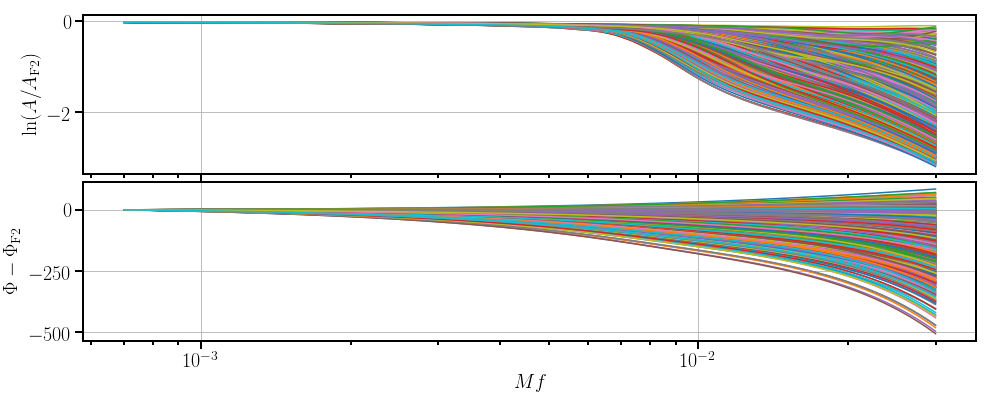

In [7]:
print len(trainset)

fig, (ax1, ax2) = wave.plot_waveforms_fd([trainset[i] for i in range(0, len(trainset), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate reduced Bases for amplitude and phase

In [8]:
epsilon = 1.0e-7

# Initialize the ReducedBasis object
add = surrogate.add_amp
subtract = surrogate.subtract_amp
scalar_multiply = surrogate.scalar_multiply_amp
inner_product = surrogate.inner_product_amp

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbamprun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbamprun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.211107750876
0.0269586950798
0.0157808173179
0.0098741571235
0.00325474391158
0.00208451036009
0.000173631204714
0.000161354998493
6.66547352917e-05
2.15242485949e-05
1.49587009217e-05
7.22031931433e-06
6.17648875412e-06
3.37832235975e-06
2.77972994323e-06
1.67719526822e-06
1.02168616178e-06
9.88578434002e-07
8.17414701926e-07
4.73974019921e-07
4.14117087844e-07
4.01332594491e-07
2.7982691253e-07
1.83894222627e-07
1.43233027106e-07
1.17678464195e-07
1.05494396552e-07
8.7385956693e-08


29


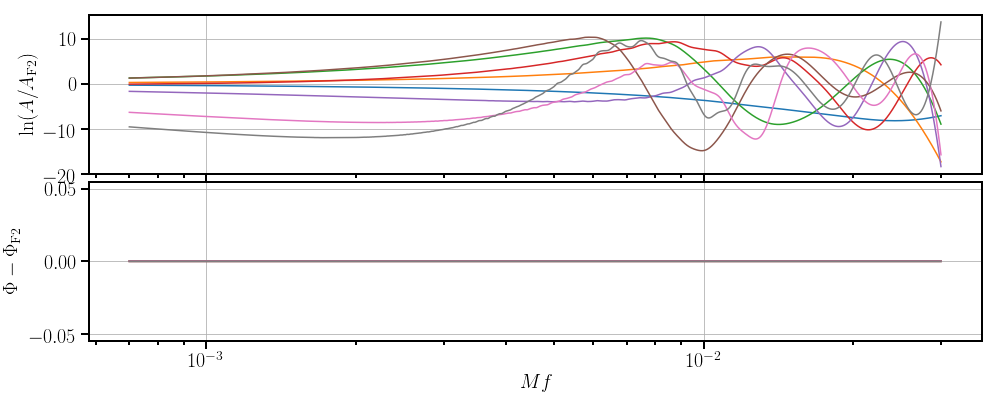

In [9]:
print len(rbamprun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbamprun.rb[:8])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

In [10]:
epsilon = 1.0e-11

# Initialize the ReducedBasis object
add = surrogate.add_phase
subtract = surrogate.subtract_phase
scalar_multiply = surrogate.scalar_multiply_phase
inner_product = surrogate.inner_product_phase

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbphaserun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbphaserun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.997084911011
0.53007104131
0.00581199665151
0.00138973826042
0.000534481358627
0.000341709931877
0.000218728986754
9.04381641256e-05
2.59733065993e-05
1.48106059111e-05
6.50890216947e-06
2.49809833908e-06
7.15246343153e-07
2.92493377074e-07
1.56589912481e-07
1.11790263269e-07
5.49838713448e-08
3.86710021782e-08
3.22613373793e-08
1.42913372247e-08
1.41085431116e-08
8.19665813001e-09
6.94151791603e-09
4.66842398072e-09
4.14497436374e-09
2.91341661907e-09
2.53083254353e-09
2.13763950985e-09
1.44340672747e-09
1.07405462302e-09
9.30368670993e-10
8.56219206646e-10
7.51555262468e-10
5.34742694569e-10
3.99400401641e-10
3.05746872264e-10
2.73049582944e-10
2.17675655279e-10
1.7831458532e-10
1.31065713838e-10
1.19823373446e-10
8.45199465971e-11
7.99194044276e-11
6.63192833983e-11
5.91278137563e-11
5.01274577402e-11
4.26373381046e-11
3.20514725871e-11
2.98336910731e-11
2.88385981762e-11
2.04165573336e-11
1.79898318464e-11
1.21981313939e-11
1.10618181282e-11
9.77762315557e-12


56


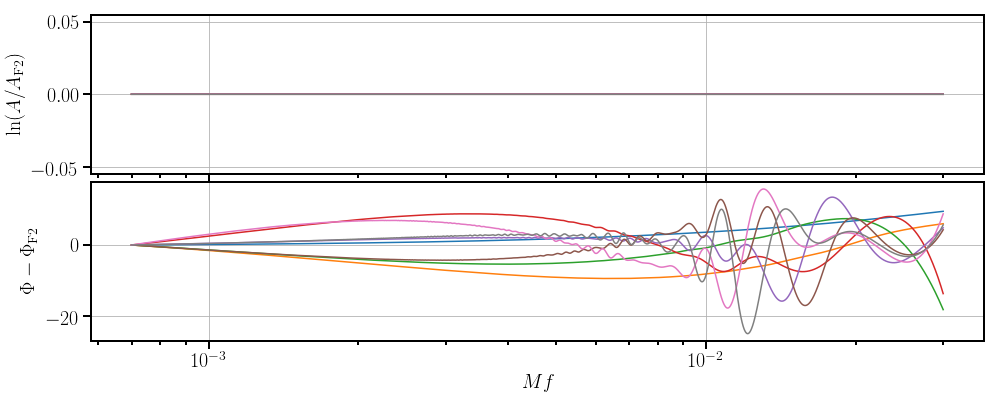

In [11]:
print len(rbphaserun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbphaserun.rb[:8])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Empirical interpolating functions

In [12]:
def save_empirical_interpolating_function_list(filename, b_j, mf_node):
    """Save the empirical interpolating functions as a HDF5WaveformSet object.
    The parameter value associated with each function b_j is the frequency of the node mf_j.
    
    Parameters
    ----------
    filename : string
    b_j : list of Waveform objects
        Empirical interpolating functions.
    mf_node : List of floats
        Frequency associated with each empirical interpolating function b_j.
    """
    bset = ws.HDF5WaveformSet(filename)
    
    for j in range(len(b_j)):
        # b_j don't have waveform parameters associated with them,
        # but you do want to save the node frequency node_mf 
        parameters = np.array([mf_node[j]])
        bset.set_waveform(j, b_j[j], parameters)
    
    bset.close()

In [13]:
# Use the first 20 bases
namp = 20
nphase = 20
empirical_node_indices_amp, Bamp_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbamprun.rb[:namp], 'amp')
empirical_node_indices_phase, Bphase_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbphaserun.rb[:nphase], 'phase')

In [14]:
# Get the frequencies Mf at each empirical node, and sort B's by the node frequency.

# amp
mf_amp = Bamp_j[0].x[empirical_node_indices_amp]
mf_Bamp_list = [[mf_amp[i], Bamp_j[i]] for i in range(len(mf_amp))]
mf_Bamp_list_sorted = sorted(mf_Bamp_list, key=lambda x: x[0])

# phase
mf_phase = Bphase_j[0].x[empirical_node_indices_phase]
mf_Bphase_list = [[mf_phase[i], Bphase_j[i]] for i in range(len(mf_phase))]
mf_Bphase_list_sorted = sorted(mf_Bphase_list, key=lambda x: x[0])

In [15]:
# Save Amplitude and phase empirical interpolants

mf = [mf_Bamp_list_sorted[i][0] for i in range(len(mf_Bamp_list_sorted))]
B_j = [mf_Bamp_list_sorted[i][1] for i in range(len(mf_Bamp_list_sorted))]
save_empirical_interpolating_function_list(Bamp_filename, B_j, mf)

mf = [mf_Bphase_list_sorted[i][0] for i in range(len(mf_Bphase_list_sorted))]
B_j = [mf_Bphase_list_sorted[i][1] for i in range(len(mf_Bphase_list_sorted))]
save_empirical_interpolating_function_list(Bphase_filename, B_j, mf)

In [16]:
# Now load them
Bamp_j = ws.HDF5WaveformSet(Bamp_filename)
Bphase_j = ws.HDF5WaveformSet(Bphase_filename)

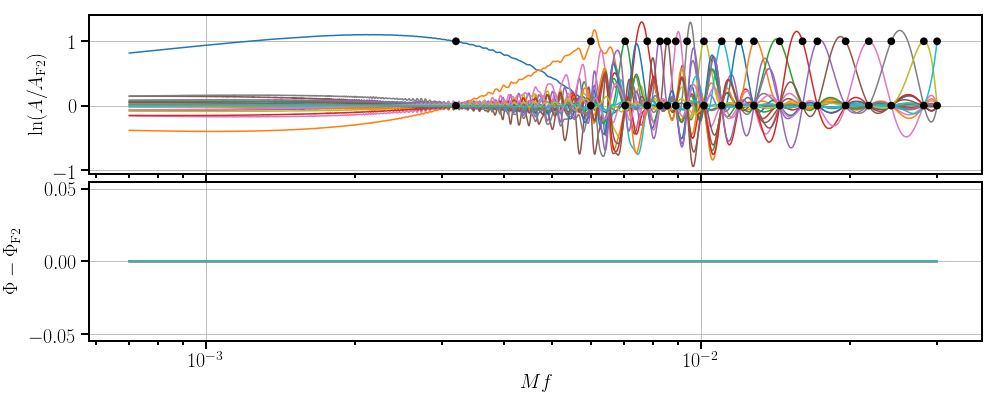

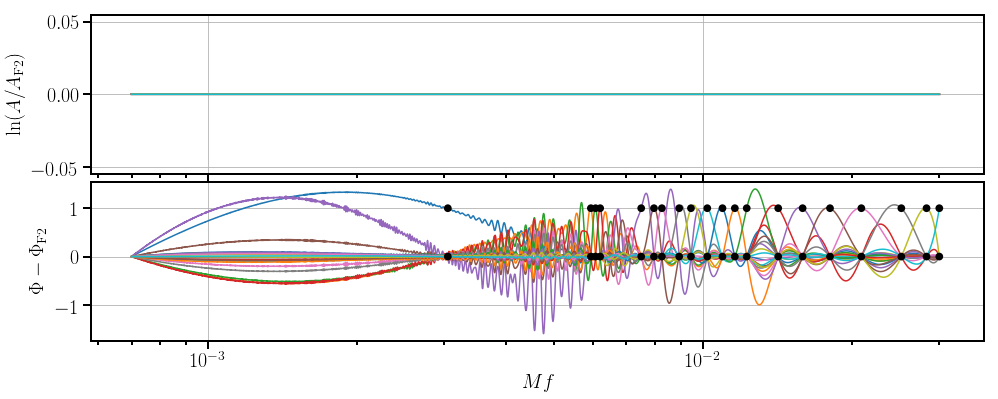

In [17]:
hs = [Bamp_j[j] for j in range(len(Bamp_j))]
mfs = np.array([Bamp_j.get_waveform(j, data='parameters')[0] for j in range(len(Bamp_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax1.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax1.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

hs = [Bphase_j[j] for j in range(len(Bphase_j))]
mfs = np.array([Bphase_j.get_waveform(j, data='parameters')[0] for j in range(len(Bphase_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax2.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax2.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Gaussian processes

In [18]:
# Calculate the amplitude for all waveforms in the training set
# at the amplitude empirical nodes
damp_ts_list = []
for j in range(len(Bamp_j)):
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    damp_ts = np.array([trainset[i].interpolate('amp')(mf) for i in range(len(trainset))])
    damp_ts_list.append(damp_ts)
    
# Calculate the phase for all waveforms in the training set
# at the phase empirical nodes
dphase_ts_list = []
for j in range(len(Bphase_j)):
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    dphase_ts = np.array([trainset[i].interpolate('phase')(mf) for i in range(len(trainset))])
    dphase_ts_list.append(dphase_ts)
    
# Relevant parameters for the training set waveforms
params_ts = trainset.parameters()

In [19]:
#limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
limits = np.array([[1.0/3.0, 1.0], [-0.4, 0.4], [-0.4, 0.4], [0.1, 3000], [0.1, 3000]])
kernel_type = 'matern52'

damp_gp_list = []
for i in range(len(damp_ts_list)):
    print i
    points = params_ts
    data = damp_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits)
    damp_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(damp_gp)
    damp_gp_list.append(damp_gp)

0
[  1.16956449e-02   1.37575377e+00   3.20000000e+00   3.20000000e+00
   1.19996000e+04   1.19996000e+04   5.20461955e-05]
1
[  3.35396267e-02   6.67604887e-01   2.81862670e+00   3.20000000e+00
   1.93873448e+03   1.19996000e+04   2.62037948e-04]
2
[  6.81914005e-02   6.50549823e-01   3.20000000e+00   3.20000000e+00
   2.20303344e+03   1.19996000e+04   4.80516574e-04]
3
[  9.90363006e-02   6.46563393e-01   3.20000000e+00   3.20000000e+00
   2.32111338e+03   1.19996000e+04   6.19597622e-04]
4
[  1.17469519e-01   6.62497091e-01   3.20000000e+00   3.20000000e+00
   2.56521626e+03   1.19996000e+04   9.48768261e-04]
5
[  1.29568628e-01   6.43585863e-01   3.20000000e+00   3.20000000e+00
   2.50087582e+03   1.19996000e+04   1.25542688e-03]
6
[  1.53407770e-01   6.30440222e-01   3.20000000e+00   3.20000000e+00
   3.04716054e+03   1.19996000e+04   1.71077678e-03]
7
[  1.82756686e-01   6.46790233e-01   3.20000000e+00   3.20000000e+00
   3.04808415e+03   1.19996000e+04   2.33148898e-03]
8
[  2.2

In [20]:
#limits = np.array([[1.0/3.0, 1.0], [-0.7, 0.7], [-0.7, 0.7], [0, 10000], [0, 10000]])
limits = np.array([[1.0/3.0, 1.0], [-0.4, 0.4], [-0.4, 0.4], [0.1, 3000], [0.1, 3000]])
kernel_type = 'matern52'

dphase_gp_list = []
for i in range(len(dphase_ts_list)):
    print i
    points = params_ts
    data = dphase_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits, length_scale_factor=[0.1, 10.0], 
                                                             sigma_n_factor=[1.0e-6, 0.1])
    #print hyper_limits
    dphase_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(dphase_gp)
    dphase_gp_list.append(dphase_gp)

0
[  3.07273918e+01   1.33824066e+00   6.52332180e+00   8.00000000e+00
   5.63462729e+03   1.94392328e+04   1.85825614e-02]
1


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.16446795e-03,   1.92390393e-03,   6.78911096e-04,
        -1.10782138e+02,   2.48528624e-03,   1.18254474e-03,
        -2.28456922e-03]), 'nit': 19, 'funcalls': 85}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.06698216e-04,   1.14952601e-04,   3.16412047e-05,
        -1.51578860e+02,   2.97146468e-04,   5.24376060e-05,
         1.50166958e-05]), 'nit': 33, 'funcalls': 91}
  " state: %s" % convergence_dict)


[  6.60291730e+01   1.32849158e+00   6.64672129e+00   8.00000000e+00
   5.48904953e+03   1.90211572e+04   4.15605368e-02]
2


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.89330420e-04,   6.73008688e-04,  -3.74345712e-03,
        -1.52024154e+02,   1.76900103e-03,  -1.33234953e-03,
         1.27133135e-03]), 'nit': 22, 'funcalls': 67}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.43257555e-03,   2.11094516e-04,  -3.73737604e-03,
        -1.52024395e+02,  -1.92597792e-03,  -9.40341091e-04,
         5.36090791e-06]), 'nit': 33, 'funcalls': 83}
  " state: %s" % convergence_dict)


[  6.73119152e+01   1.32611290e+00   6.63814069e+00   8.00000000e+00
   5.47789781e+03   1.89352086e+04   4.25978752e-02]
3
[  6.88145476e+01   1.32625348e+00   6.63699544e+00   8.00000000e+00
   5.47110840e+03   1.88904494e+04   4.34936854e-02]
4


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  5.86555143e-05,  -1.68332799e-03,  -8.57767062e-04,
        -1.51005068e+02,   8.47647356e-05,   1.16260360e-03,
         3.26035263e-04]), 'nit': 22, 'funcalls': 70}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -8.95776593e-05,   5.57548883e-05,   6.60967770e-05,
        -1.51005464e+02,  -9.06227464e-05,   1.98750463e-04,
         8.79474283e-05]), 'nit': 24, 'funcalls': 72}
  " state: %s" % convergence_dict)
/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b te

[  8.35474417e+01   1.32872468e+00   6.64377831e+00   8.00000000e+00
   5.40899671e+03   1.87099662e+04   5.41048101e-02]
5


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.31479275e-03,  -4.71845050e-03,  -1.01579880e-03,
        -1.50944972e+02,   2.86194652e-03,  -3.27945328e-03,
         2.99265179e-04]), 'nit': 21, 'funcalls': 64}
  " state: %s" % convergence_dict)


[  8.78784826e+01   1.32882988e+00   6.63302330e+00   8.00000000e+00
   5.34197529e+03   1.85113405e+04   5.75511151e-02]
6


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.28149850e-04,   1.97761513e-03,  -7.82739353e-04,
        -1.09206668e+02,   2.81961030e-04,  -4.54485717e-04,
        -3.13983082e-03]), 'nit': 19, 'funcalls': 62}
  " state: %s" % convergence_dict)


[  9.05358429e+01   1.32822401e+00   6.60654937e+00   8.00000000e+00
   5.29157024e+03   1.84950655e+04   6.03479278e-02]
7
[  9.80317119e+01   1.33421173e+00   6.57629404e+00   8.00000000e+00
   5.32758974e+03   1.84379980e+04   6.73905935e-02]
8


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.21881747e-03,  -4.84655134e-04,  -4.83647872e-04,
        -1.48963386e+02,  -4.78839365e-03,   2.37391426e-03,
         2.50899549e-05]), 'nit': 19, 'funcalls': 63}
  " state: %s" % convergence_dict)


[  1.01580844e+02   1.33188706e+00   6.56258927e+00   8.00000000e+00
   5.19422356e+03   1.81060534e+04   7.07127978e-02]
9
[  1.08042543e+02   1.33303125e+00   6.51807044e+00   8.00000000e+00
   5.11347546e+03   1.79098195e+04   7.62257336e-02]
10
[  1.14742883e+02   1.33605904e+00   6.49824441e+00   8.00000000e+00
   5.11885744e+03   1.78672484e+04   8.46693574e-02]
11


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.47493059e-03,   6.39175301e-03,   1.27569746e-03,
        -1.46922993e+02,   2.24135458e-03,   4.49295131e-04,
        -6.30629749e-05]), 'nit': 17, 'funcalls': 61}
  " state: %s" % convergence_dict)


[  1.19023376e+02   1.33400430e+00   6.46942459e+00   8.00000000e+00
   5.03473459e+03   1.76900833e+04   9.08185027e-02]
12


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.22619625e-04,  -1.43110005e-04,   7.56657982e-04,
        -1.47149185e+02,   1.31668045e-03,   4.41122914e-04,
         1.24347955e-04]), 'nit': 19, 'funcalls': 67}
  " state: %s" % convergence_dict)


[  1.23646233e+02   1.33552015e+00   6.44978141e+00   8.00000000e+00
   4.93560803e+03   1.75037323e+04   9.46907123e-02]
13
[  1.37951641e+02   1.33823616e+00   6.48840602e+00   8.00000000e+00
   4.72279170e+03   1.70105812e+04   1.03059118e-01]
14
[  1.49069718e+02   1.33343566e+00   6.56092399e+00   8.00000000e+00
   4.56356455e+03   1.66098300e+04   1.10298497e-01]
15
[  1.62890854e+02   1.33045950e+00   6.65475972e+00   8.00000000e+00
   4.42451032e+03   1.62451537e+04   1.17605138e-01]
16


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.56598326e-03,  -4.43031951e-03,  -6.67727175e-03,
        -1.55531758e+02,  -7.78897015e-03,  -8.14654592e-03,
         1.75925978e-03]), 'nit': 27, 'funcalls': 80}
  " state: %s" % convergence_dict)


[  1.82867984e+02   1.33365759e+00   6.79776248e+00   8.00000000e+00
   4.34800682e+03   1.59982212e+04   1.25348281e-01]
17
[  2.16111636e+02   1.33572420e+00   7.07611267e+00   8.00000000e+00
   4.37872639e+03   1.60061049e+04   1.35722736e-01]
18
[  2.43804868e+02   1.33594529e+00   7.33569405e+00   8.00000000e+00
   4.48135749e+03   1.62170083e+04   1.42518111e-01]
19
[  2.60678211e+02   1.33678215e+00   7.50212866e+00   8.00000000e+00
   4.55826947e+03   1.63837919e+04   1.45614389e-01]


In [21]:
# Save GPR functions
gpr.save_gaussian_process_regression_list(amp_gp_filename, damp_gp_list, 'matern52')
gpr.save_gaussian_process_regression_list(phase_gp_filename, dphase_gp_list, 'matern52')

# Diagnosing GP fit

In [22]:
def symlog_yticks(axes):
    decade = np.array([0.1*i for i in range(10)])
    ticks = []
    for i in range(-1, 2):
        ticks.append(decade*10**i)
    ticks = np.concatenate(np.array(ticks))
    ticks_rev = np.flip(ticks, 0)
    all_ticks = np.concatenate((-ticks_rev, ticks)) 
    axes.set_yticks(all_ticks, minor=True)
    #axes.set_yticks(all_ticks)

In [22]:
dh_testset_uni = ws.HDF5WaveformSet('../data/dh_test_set_uniform_p00015.hdf5')

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


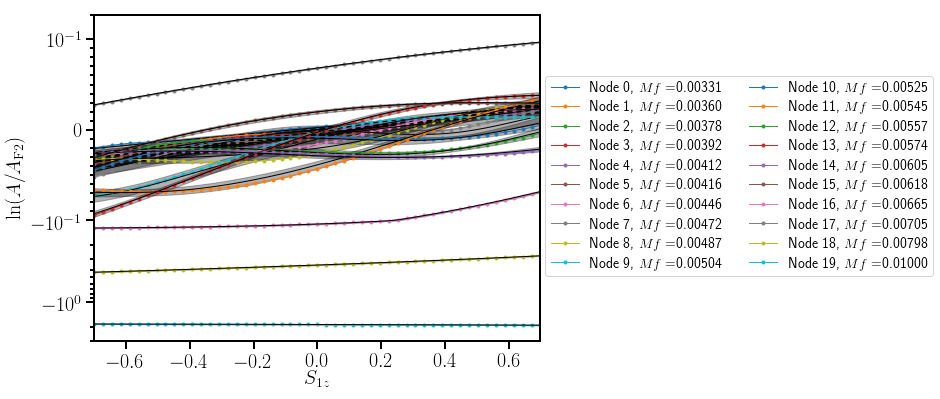

In [23]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(damp_gp_list)):
    # Node frequency
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([dh_testset_uni[i].interpolate('amp')(mf) for i in range(len(dh_testset_uni))])
    damp_gp = damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], damp_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], damp_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_yscale('symlog', linthreshy=0.1)
#axes.set_yticks(ticks, minor=True)
symlog_yticks(axes)
axes.set_ylim(-3, 0.2)
axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\ln(A/A_{\rm F2})$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

[  6.00000000e-01  -7.00000000e-01   2.00000000e-01   2.00000000e+03
   1.00000000e+03]


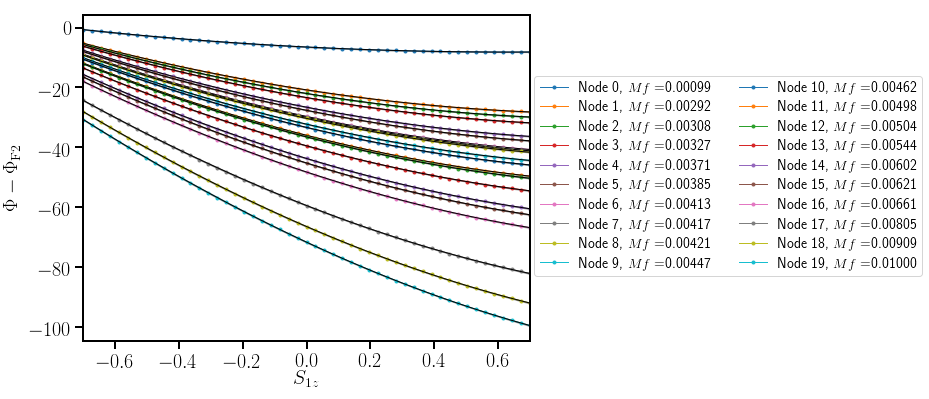

In [24]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(dphase_gp_list)):
    # Node frequency
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([dh_testset_uni[i].interpolate('phase')(mf) for i in range(len(dh_testset_uni))])
    dphase_gp = dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], dphase_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], dphase_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

# Diagnostics (Everything below should go in separate notebooks)

# Plot frequency dependent error estimates

In [167]:
# Bamp_filename = '../data/Bamp.hdf5'
# Bphase_filename = '../data/Bphase.hdf5'
# damp_gp_filename = '../data/amp_gp.hdf5'
# dphase_gp_filename = '../data/phase_gp.hdf5'

# Bamp = ws.HDF5WaveformSet(Bamp_filename)
# Bphase = ws.HDF5WaveformSet(Bphase_filename)
# damp_gp_list = gpr.load_gaussian_process_regression_list(damp_gp_filename)
# dphase_gp_list = gpr.load_gaussian_process_regression_list(dphase_gp_filename)

In [168]:
def error_of_frequency(point, B_j, gp_list, data='amp'):
    jmax = len(B_j)
    eps_f_j = np.array([gp_list[j].predict(np.atleast_2d(point), return_std=True)[1][0] 
                        for j in range(jmax)])
    
    # Get complex version of B_j's in array form
    if data=='amp':
        B_j_array = np.array([B_j[j].amp for j in range(jmax)])
    elif data=='phase':
        B_j_array = np.array([B_j[j].phase for j in range(jmax)])
    else:
        raise Exception

    # Evaluate waveform
    error_arr = np.dot(eps_f_j, B_j_array)

    # Rewrite as TimeDomainWaveform
    xarr = B_j[0].x
    return xarr, error_arr

In [177]:
point = np.array([0.8, 0.3, 0.7, 3455, 2579])
f, eps = error_of_frequency(point, Bamp, damp_gp_list, data='amp')
#f, eps = error_of_frequency(point, Bphase, dphase_gp_list, data='phase')

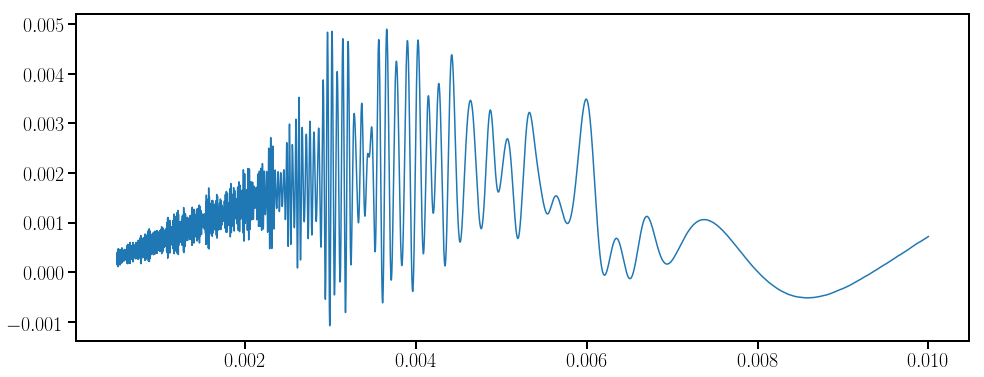

In [178]:
fig, ax1 = plt.subplots(1, figsize=(16, 6))
ax1.plot(f, eps)
#ax1.set_xscale('log')
#ax1.set_xlim(1.0e-4, 0.1)

0.00304761357728


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/lackey/Library/Python/2.7/lib/python/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


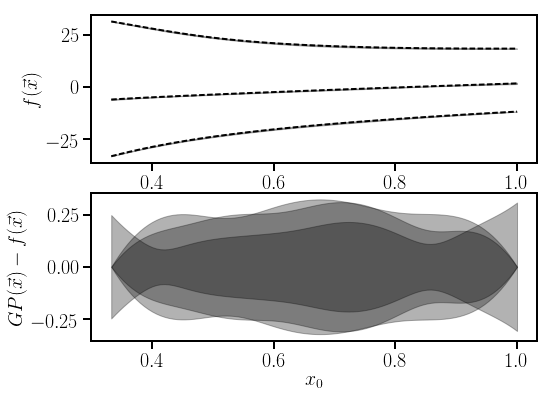

In [184]:
#x2, x3, x4 = 0.0, 2000.0, 2000.0
#x0, x1, x2, x3, x4 = params_rand[i_phasemax]
x0, x1, x2, x3, x4 = 1.0/3.0, -0.7, -0.7, 0.0, 0.0
i = 2
mf = Bphase_j.get_waveform(i, data='parameters')[0]
print mf
gp = dphase_gp_list[i]

fig, ax = plt.subplots(2, figsize=(8, 6))
for x1 in np.linspace(-0.7, 0.7, 3):
    x0s = np.linspace(1.0/3.0, 1.0, 100)
    ps = np.array([[x0, x1, x2, x3, x4] for x0 in x0s])
    
    #true = np.array([func(p) for p in ps])
    #ax[0].plot(xs, true, label=r'$x_1$='+str(x1))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(x0s, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(x0s, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    #ax[1].plot(x0s, (y_pred-true), label=r'$x_1$='+str(x1))
    ax[1].fill_between(x0s, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))